# Introduction to Regression with Neural Network in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# Create some data to view and fit

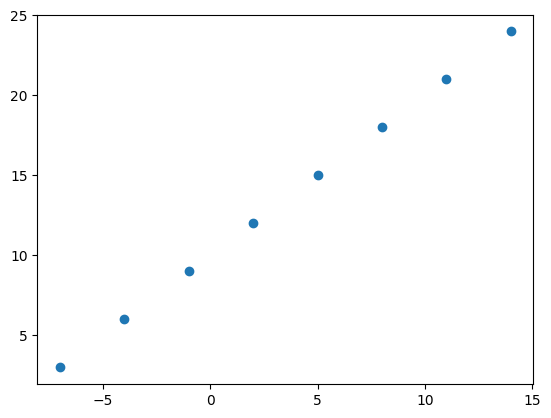

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into Tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

# Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).
4. **Evaluating a model** - use a model's predictions to evaluate its performance.

In [7]:
tf.expand_dims(X, axis=-1)

<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]], dtype=float32)>

In [8]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 18.4342 - mae: 18.4342
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 18.1530 - mae: 18.1530
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 17.8717 - mae: 17.8717
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 17.5905 - mae: 17.5905
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 17.3092 - mae: 17.3092


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 121ms/step


array([[-13.906]], dtype=float32)

## Improving our model
We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 9.7075 - mae: 9.7075
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5750 - mae: 9.5750
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4425 - mae: 9.4425
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 9.3100 - mae: 9.3100
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1775 - mae: 9.1775
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0450 - mae: 9.0450
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 8.9125 - mae: 8.9125
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7800 - mae: 8.7800
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.6475 - mae: 8.6475
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 8.5150 - mae: 8.5150
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 8.382

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.925564]], dtype=float32)

# Experimenting 1 to improve our model

In [14]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 13.7232 - mae: 13.7232
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2540 - mae: 13.2540
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7831 - mae: 12.7831
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 12.3104 - mae: 12.3104
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.8358 - mae: 11.8358
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3592 - mae: 11.3592
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.8804 - mae: 10.8804
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3991 - mae: 10.3991
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9150 - mae: 9.9150
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4275 - mae: 9.4275
Epoch 11/100
1/1 [==============================] - 0s 4ms/st

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 60ms/step


array([[26.177692]], dtype=float32)

## Evaluate our model

In practice, a typical workflow you'll go through when building neural networks is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize."

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels).

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

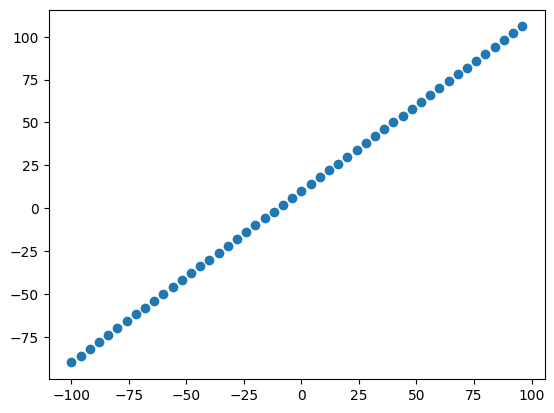

In [18]:
# Visualize the data
plt.scatter(X, y);

# The 3 sets...
* **Training set** - the model learns from this data, which is typically 70-80% of the **total data** you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the **total data** you have available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the **total data** you have available.

In [19]:
# Check the length of each
len(X), len(y)

(50, 50)

In [20]:
# Split the data into training and test sets
X_train = X[:40] # first 40 examples (80% of the data)
y_train = y[:40]
X_test = X[40:] # last 10 examples (20% of the data)
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [21]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

# Visualizing the data
Now we've got our data in training and test sets, let's visualize it again.

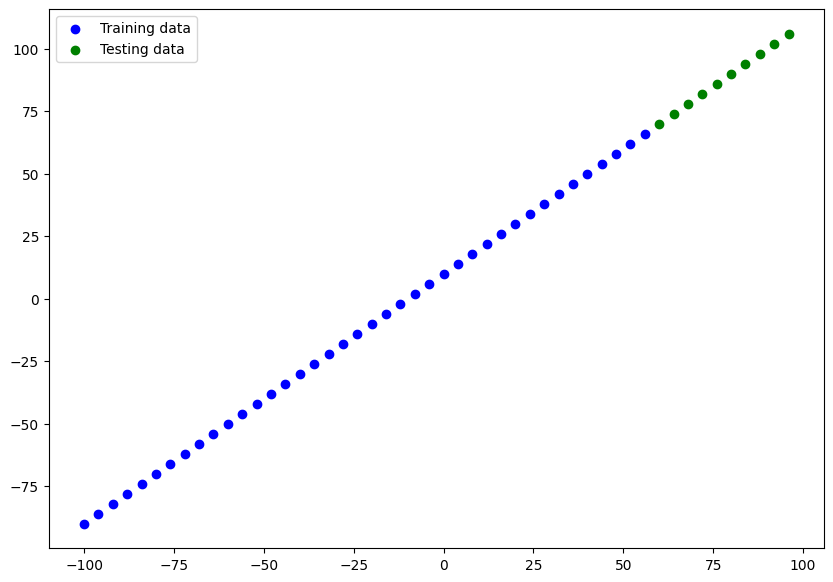

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [23]:
# Let build a model which build automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)
# Create the model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.losses.mae])

In [24]:
# Visualize the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).
📖 **Resouce** For a more in-depth overview of the trainable parameters within a layer, check out MIT's 6.S191: Introduction to Deep Learning [video](https://youtu.be/aircAruvnKk) (around 18:00 - 26:00).
⚒ **Exercise:** Try playing around with the number of hidden units in the Dense layer, see how that affects the number of trainable parameters (total and trainable) by calling `model.summary()`.

In [25]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


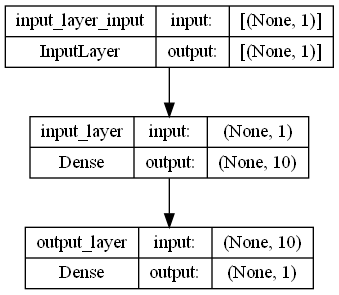

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file="model.png")

In [27]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 32.1153 - mean_absolute_error: 32.1153
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 25.7577 - mean_absolute_error: 25.7577
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 19.6905 - mean_absolute_error: 19.6905
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.7400 - mean_absolute_error: 13.7400
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8964 - mean_absolute_error: 8.8964
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1377 - mean_absolute_error: 9.1377
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9949 - mean_absolute_error: 10.9949
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8424 - mean_absolute_error: 11.8424
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6876 - mean_absolute_error: 11.6876
Epoch 10/100
2

## Visualizing our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.
Often you'll see this in the form of `y_test` or `y_true` vs. `y_pred` (ground truth vs. your model's predictions).

In [28]:
# Make some predictions
y_pred = model.predict(X_test)
y_test, y_pred

1/1 [==============================] - 0s 43ms/step


(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>,
 array([[ 69.86669 ],
        [ 73.86521 ],
        [ 77.86373 ],
        [ 81.86227 ],
        [ 85.86077 ],
        [ 89.8593  ],
        [ 93.85782 ],
        [ 97.85634 ],
        [101.854866],
        [105.85337 ]], dtype=float32))

🔑 **Note:** If you fell like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [29]:
# Let's create a plotting function
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

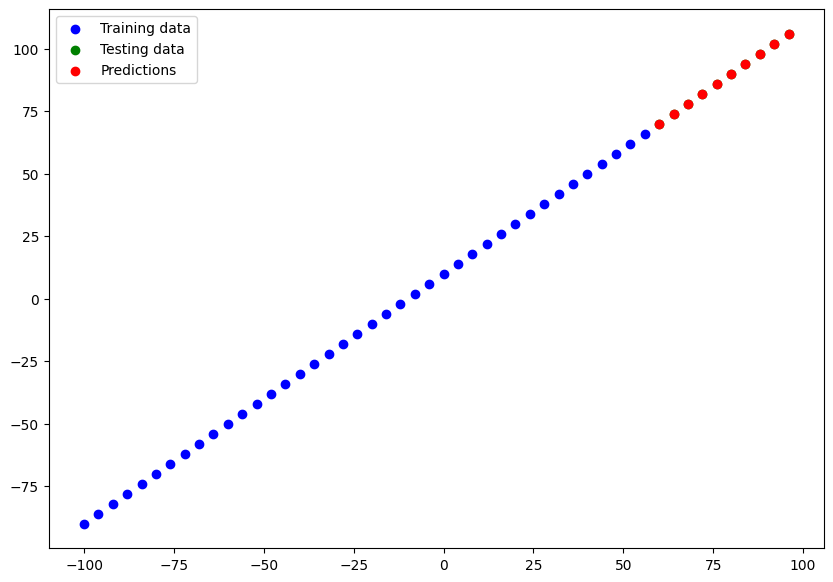

In [30]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics
Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* **MAE** - mean absolute error, a measure of how wrong each of your model's predictions are on average.
* **MSE** - mean squared error, a measure of how wrong each of your model's predictions are squared on average (more popular than MAE).

In [31]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 0.1400 - mean_absolute_error: 0.1400


[0.1399635374546051, 0.1399635374546051]

In [32]:
y_pred, y_test

(array([[ 69.86669 ],
        [ 73.86521 ],
        [ 77.86373 ],
        [ 81.86227 ],
        [ 85.86077 ],
        [ 89.8593  ],
        [ 93.85782 ],
        [ 97.85634 ],
        [101.854866],
        [105.85337 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [33]:
# reshape y_pred to the same shape and same type as y_test
tf.reshape(y_pred, shape=(10,)) , tf.cast(y_test, dtype=tf.float32)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.86669 ,  73.86521 ,  77.86373 ,  81.86227 ,  85.86077 ,
         89.8593  ,  93.85782 ,  97.85634 , 101.854866, 105.85337 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [34]:
# Squeeze is used to remove the extra dimension into a 1D array
tf.squeeze(y_pred), tf.cast(y_test, dtype=tf.float32)

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 69.86669 ,  73.86521 ,  77.86373 ,  81.86227 ,  85.86077 ,
         89.8593  ,  93.85782 ,  97.85634 , 101.854866, 105.85337 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [35]:
#　Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=tf.cast(y_test, dtype=tf.float32),
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.13996354>

In [36]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=tf.cast(y_test, dtype=tf.float32),
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.019607846>

In [37]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Building `model_1`

In [38]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
], name="model_1")

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1874 - mae: 12.1874
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 13.0149 - mae: 13.0149
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.6602 - mae: 11.6602
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3410 - mae: 9.3410
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2172 - mae: 10.2172
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4730 - mae: 9.4730
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6052 - mae: 8.6052
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0411 - mae: 9.0411
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.8506 - mae: 18.8506
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1647 - mae: 10.1647
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 39ms/step


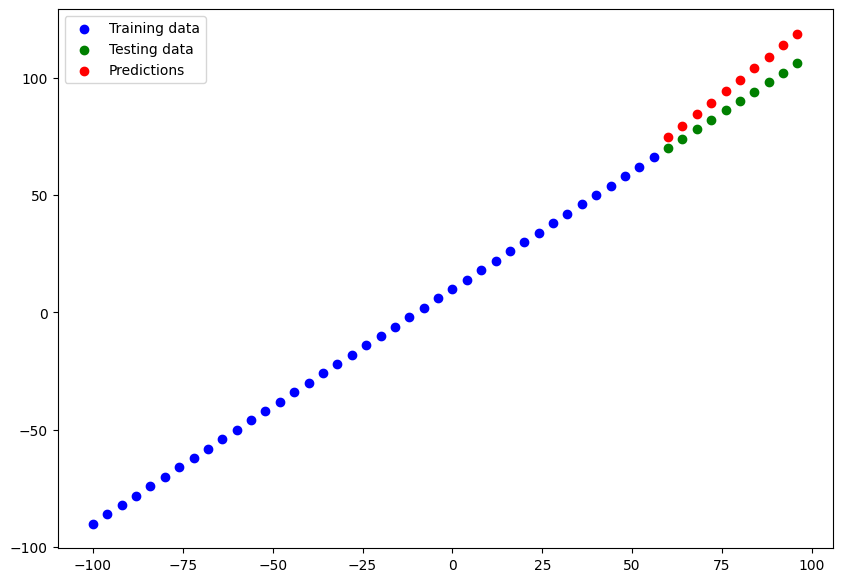

In [39]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_1)

In [40]:
# Evaluate model_1
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.650849>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.358536>)

In [41]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 41.1882 - mae: 41.1882
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 31.8188 - mae: 31.8188
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 28.5932 - mae: 28.5932
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 15.9014 - mae: 15.9014
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 21.9681 - mae: 21.9681
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2015 - mae: 11.2015
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.2550 - mae: 12.2550
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 10.9878 - mae: 10.9878
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 38.6300 - mae: 38.6300
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 26.1184 - mae: 26.1184
Epoch 11/100
2/2 [==============================] - 0s 4ms/

1/1 [==============================] - 0s 42ms/step


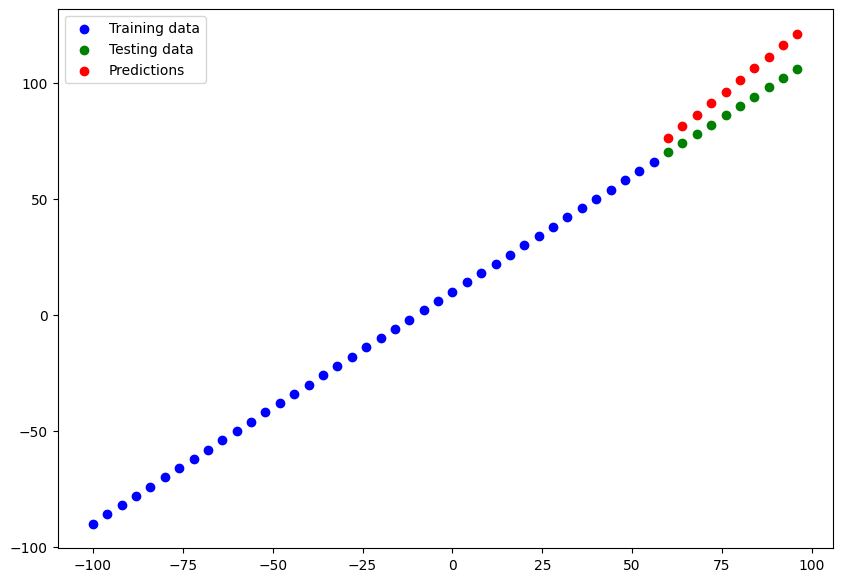

In [42]:
# Make and plot predictions for model_2
y_pred_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_2)

In [43]:
# Evaluate model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2.numpy(), mse_2.numpy()

(10.745449, 123.29993)

In [44]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name="hidden_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 18.6793 - mae: 18.6793
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 21.7285 - mae: 21.7285
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 27.6355 - mae: 27.6355
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 19.4393 - mae: 19.4393
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13.1534 - mae: 13.1534
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 10.6387 - mae: 10.6387
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.5968 - mae: 11.5968
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2186 - mae: 11.2186
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 42.1190 - mae: 42.1190
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 29.3000 - mae: 29.3000
Epoch 11/500
2/2 [==============================] - 0s 5ms/

1/1 [==============================] - 0s 47ms/step


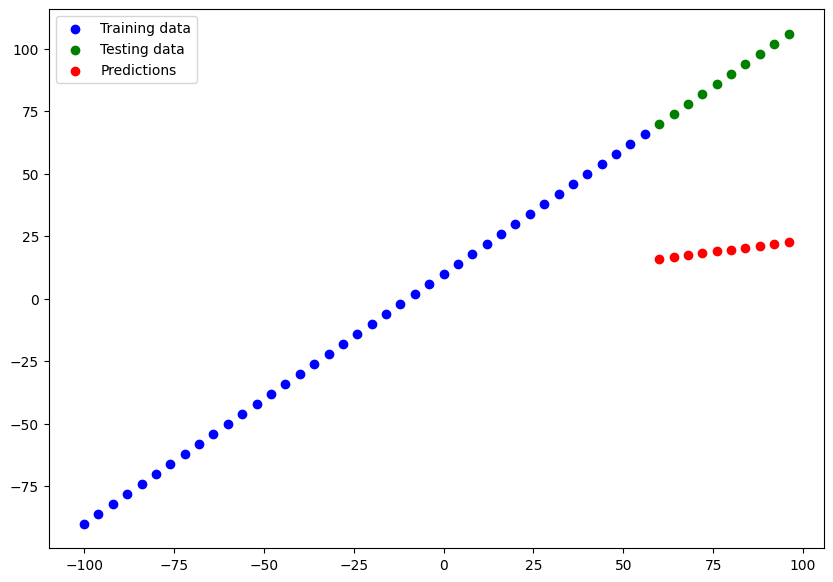

In [45]:
# Make and plot predictions for model_3
y_pred_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred_3)

In [46]:
# Evaluate model_3
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69657>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.69>)

 ?? **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [47]:
# Let's compare the results of our experiments
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.650849,81.358536
1,model_2,10.745449,123.299927
2,model_3,68.696571,4805.689941


In [48]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


?? **Note: ** One of your main goals should be minimizing the time between your experiments. The more experiments you do, the more things you'll figure out which don't work in turn, get closer to figuring out what does work. Remember, machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments. And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

?? **Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).
* Comet.ml - another experiment tracking tool with some nice features.

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format.
2. The HDF5 format.

In [49]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [50]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [51]:
# Load in the SavedModel format model
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Check if the loaded SavedModel format model's predictions match those of the original model
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=-1))
loaded_saved_model_preds = loaded_saved_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_saved_model_preds

1/1 [==============================] - 0s 48ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [53]:
# Load in the HDF5 format model
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Check if the loaded HDF5 format model's predictions match those of the original model
loaded_h5_model_preds = loaded_h5_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [55]:
# Evaluate model_3
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69657>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.69>)

 ?? **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [56]:
# Let's compare the results of our experiments
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.650849,81.358536
1,model_2,10.745449,123.299927
2,model_3,68.696571,4805.689941


In [57]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


?? **Note: ** One of your main goals should be minimizing the time between your experiments. The more experiments you do, the more things you'll figure out which don't work in turn, get closer to figuring out what does work. Remember, machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments
One really good habit in machine learning modelling is to track the results of your experiments. And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

?? **Resource:** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).
* Comet.ml - another experiment tracking tool with some nice features.

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format.
2. The HDF5 format.

In [58]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [59]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [60]:
# Load in the SavedModel format model
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Check if the loaded SavedModel format model's predictions match those of the original model
model_2_preds = model_2.predict(tf.expand_dims(X_test, axis=-1))
loaded_saved_model_preds = loaded_saved_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_saved_model_preds

1/1 [==============================] - 0s 45ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [62]:
# Load in the HDF5 format model
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Check if the loaded HDF5 format model's predictions match those of the original model
loaded_h5_model_preds = loaded_h5_model.predict(tf.expand_dims(X_test, axis=-1))
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])